In [12]:
import pandas as pd
data = pd.read_csv("instagram_reach.csv")
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted(hours),Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                100 non-null    int64 
 1   S.No                      100 non-null    int64 
 2   USERNAME                  100 non-null    object
 3   Caption                   94 non-null     object
 4   Followers                 100 non-null    int64 
 5   Hashtags                  100 non-null    object
 6   Time since posted(hours)  100 non-null    int64 
 7   Likes                     100 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


# To understand the maximum type of words used in Instagram captions and hashtags

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')

In [ ]:
import matplotlib.pyplot as plt
import re
import seaborn as sns
sns.set()
plt.style.use('seaborn-whitegrid')

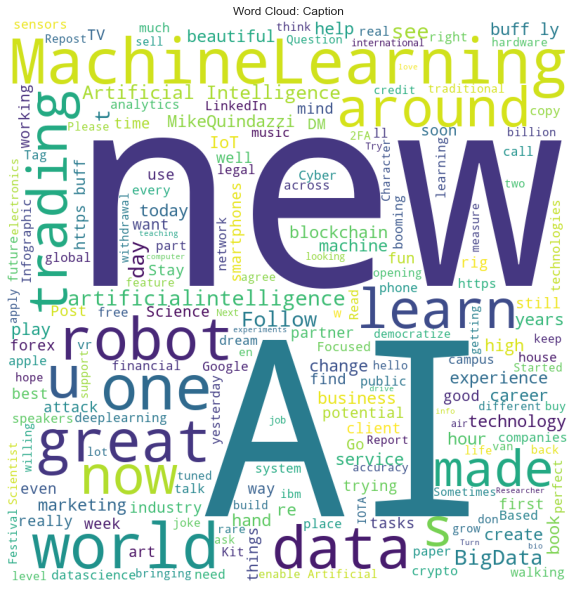

In [5]:
def WordCloudPlotter(dfColumn):
    colData = data[dfColumn]
    textCloud = ''
    
    #text processing converting colums to a single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    # plotting word cloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='white', 
                                  stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.style.use('seaborn-whitegrid')
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(dfColumn))
    plt.tight_layout(pad = 0) 

    plt.show()
WordCloudPlotter('Caption')

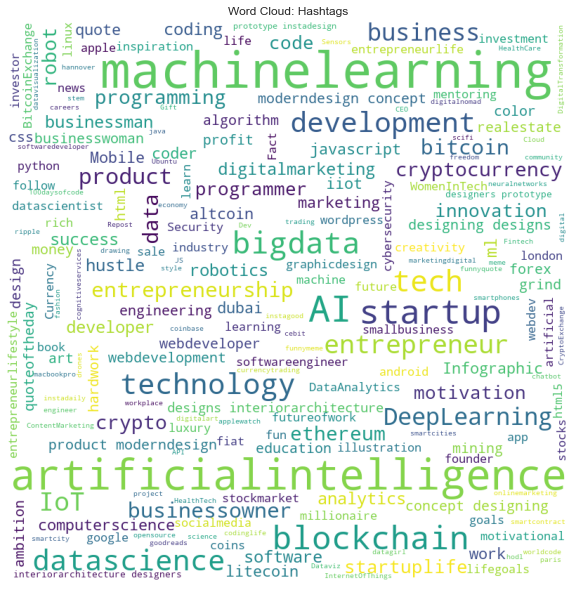

In [10]:
WordCloudPlotter('Hashtags')

# Number of likes, based on the no. of followers & the time elapsed since post

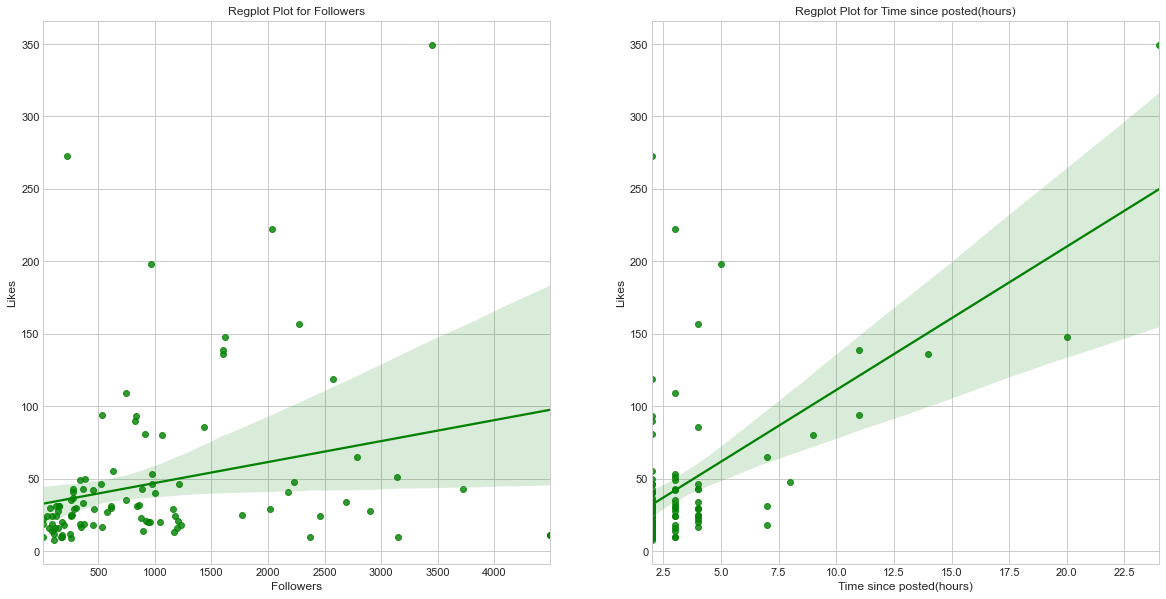

In [14]:
def PlotData(features):
    plt.figure(figsize= (20, 10))    
    pltNum = 1
    for mem in features:
        plt.subplot(1, 2 , pltNum)
        plt.style.use('seaborn-whitegrid')
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sns.regplot(data = data, x = mem, y = 'Likes' , color = 'green')
        pltNum += 1
    
    plt.show()
    
PlotData(['Followers','Time since posted(hours)'])

# Predicting the likes based on followers and time feature

In [15]:
import numpy as np
features = np.array(data[['Followers', 'Time since posted(hours)']], dtype = 'float32')
targets = np.array(data['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


# Training the model

In [16]:
targets = targets/maxValLikes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(features, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

GradientBoostingRegressor()

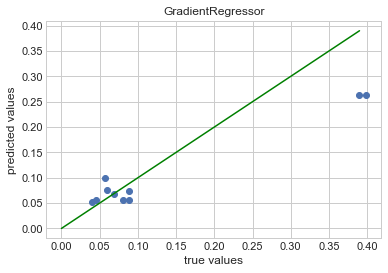

In [17]:
predictions = gbr.predict(xTest)
plt.scatter(yTest, predictions)
plt.style.use('seaborn-whitegrid')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

# Realtime cases

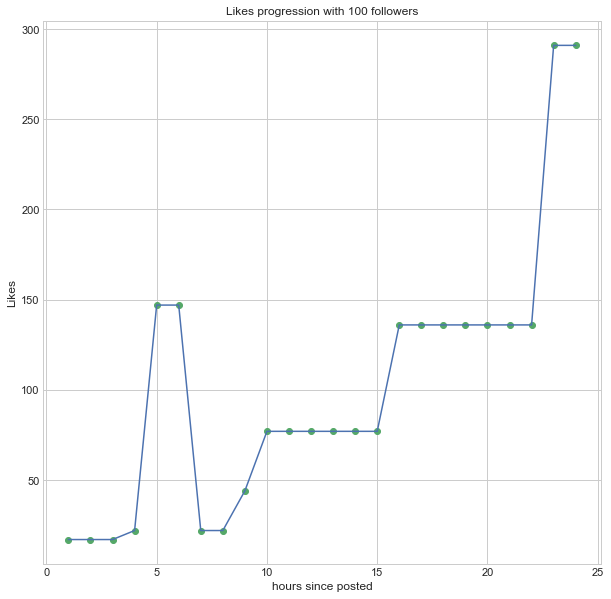

In [18]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.style.use('seaborn-whitegrid')
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()
    
PredictionsWithConstantFollowers(gbr, 100, stdSc, maxValLikes)

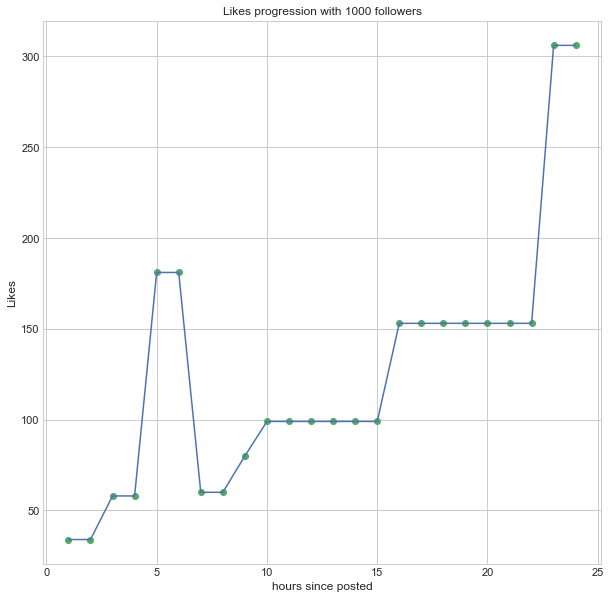

In [19]:
# Like progression for 1000 followers
PredictionsWithConstantFollowers(gbr, 1000, stdSc, maxValLikes)